## 1차 차분 사례

### 비정상식{열데이터를 정상성데이터로 차분

C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=50, freq='M')
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE

ADF 통계량: -185661659304750.8750
p-value: 0.0000


C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\158572190.py:26: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\

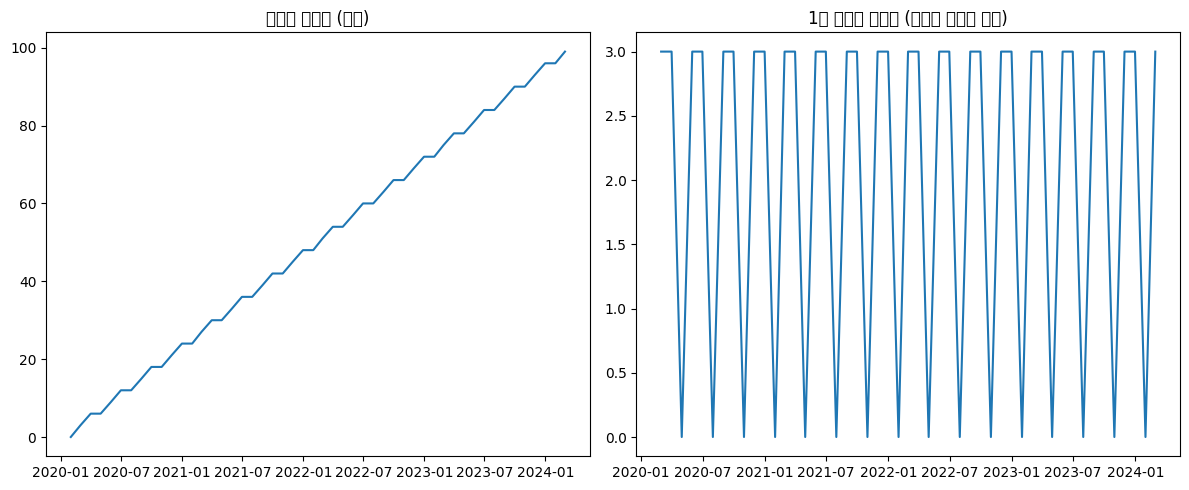

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 예시: 비정상 시계열 데이터 생성
date_range = pd.date_range(start='2020-01-01', periods=50, freq='M')
trend_data = pd.Series([i * 2 + (i % 3) for i in range(50)], index=date_range)

# 1차 차분 수행
# .diff()는 한 시점 전 값과의 차이를 계산하여 추세(trend)를 제거합니다.
# dropna()는 첫 차분 결과가 NaN이 되므로 제거.

differenced = trend_data.diff().dropna()

# 정상성 검정 (ADF Test)
# adfuller()는 ADF (Augmented Dickey-Fuller) 정상성 검정을 수행합니다.
adf_result = adfuller(differenced)
print(f"ADF 통계량: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(trend_data)
plt.title("비정상 시계열 (원본)")

plt.subplot(1, 2, 2)
plt.plot(differenced)
plt.title("1차 차분된 시계열 (정상성 가능성 높음)")
plt.tight_layout()
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# ADF 결과 출력 함수
def print_adf_result(adf_result):
    print("===== ADF 검정 결과 =====")
    print(f"ADF Test Statistic : {adf_result[0]:.4f}")
    print(f"p-value            : {adf_result[1]:.4f}")
    print(f"# of lags used     : {adf_result[2]}")
    print(f"# of observations  : {adf_result[3]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.4f}")

# 결과 출력
print_adf_result(adf_result)


===== ADF 검정 결과 =====
ADF Test Statistic : -185661659304750.8750
p-value            : 0.0000
# of lags used     : 9
# of observations  : 39
Critical Values:
    1%: -3.6104
    5%: -2.9391
    10%: -2.6081


In [ ]:
# 위 그래프는 비정상 시계열 데이터와 이를 1차 차분하여 정상화한 시계열 데이터를 비교한 시각화입니다.

# 그래프 위에는 ADF (Augmented Dickey-Fuller) 검정 결과가 표시되어 있습니다:

# ADF 통계량이 작고 (더 음수일수록),

# p-value < 0.05 이면

# 통계적으로 정상성을 갖는다고 판단합니다.

# 이렇게 **1차 차분(differencing)**을 통해 추세가 제거되고 정상성 시계열로 변환된 것을 확인할 수 있습니다.
# 이를 기반으로 ARIMA 같은 선형 시계열 모델에 적용할 수 있습니다

## 2차 차분,  계절 차분

C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\1974955958.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=60, freq='M')


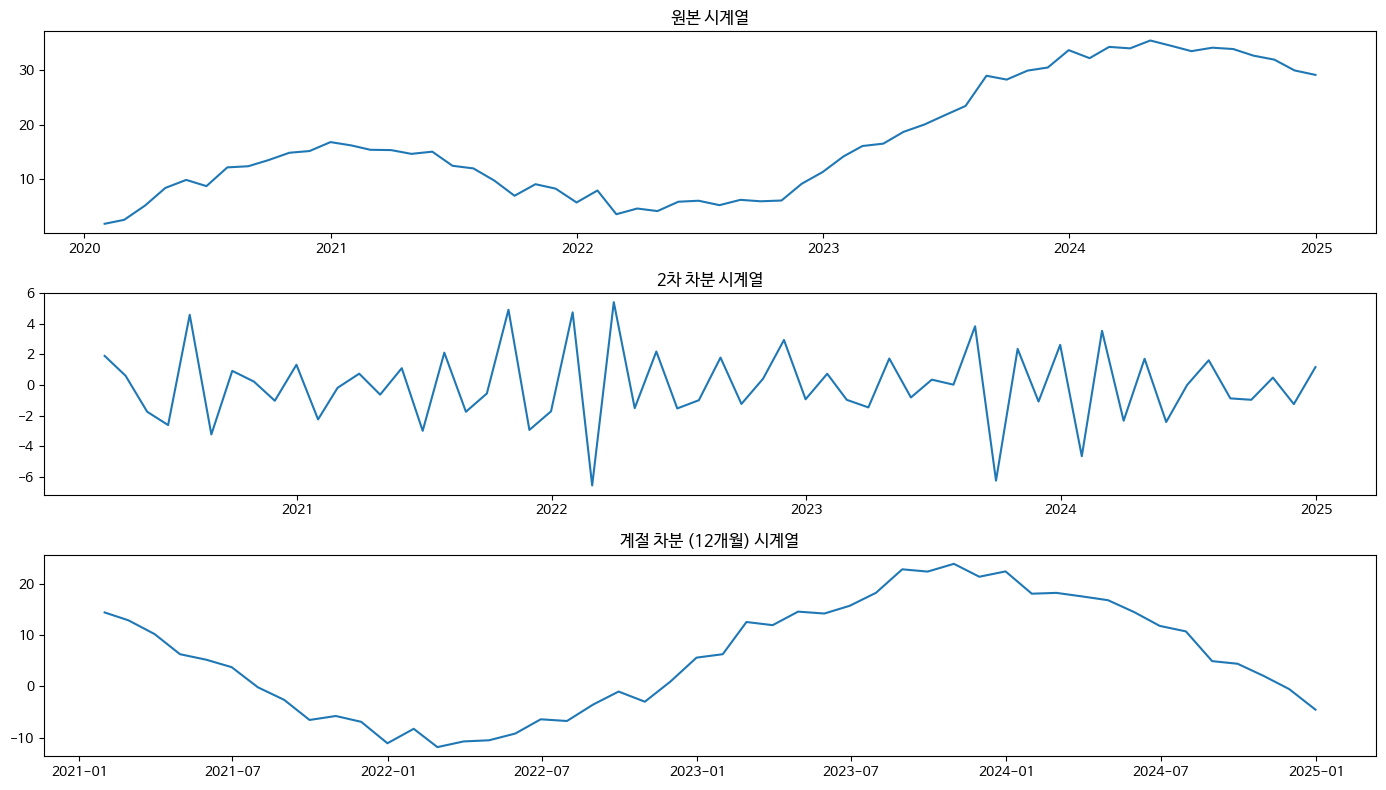

ModuleNotFoundError: No module named 'ace_tools'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 예시: 비정상 시계열 데이터 생성 (추세와 계절성 포함)
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01', periods=60, freq='M')
trend = np.arange(60) * 0.5
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 60))
noise = np.random.normal(0, 1, 60)
data = trend + seasonality + noise
series = pd.Series(data, index=date_range)

# 2차 차분
first_diff = series.diff().dropna()
second_diff = first_diff.diff().dropna()

# 계절 차분 (주기 12개월)
seasonal_diff = series.diff(12).dropna()

# ADF 검정
adf_second = adfuller(second_diff)
adf_seasonal = adfuller(seasonal_diff)

# 시각화
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(series)
plt.title("원본 시계열")

plt.subplot(3, 1, 2)
plt.plot(second_diff)
plt.title("2차 차분 시계열")

plt.subplot(3, 1, 3)
plt.plot(seasonal_diff)
plt.title("계절 차분 (12개월) 시계열")

plt.tight_layout()
plt.show()

# ADF 결과 요약
adf_summary = pd.DataFrame({
    'ADF Statistic': [adf_second[0], adf_seasonal[0]],
    'p-value': [adf_second[1], adf_seasonal[1]],
    'Used Lags': [adf_second[2], adf_seasonal[2]],
    'Used Observations': [adf_second[3], adf_seasonal[3]]
}, index=['2차 차분', '계절 차분'])

import ace_tools as tools; tools.display_dataframe_to_user(name="ADF 테스트 결과", dataframe=adf_summary)


In [ ]:
# 차분 유형	ADF 통계량	p-value	사용된 지연(lag) 수	사용된 관측치 수
# 2차 차분	-10.7197	3.17e-19	1	56
# 계절 차분	-5.3402	4.52e-06	9	38

# 해석:
# 두 경우 모두 p-value < 0.05로 유의수준 5%에서 귀무가설(비정상 시계열)을 기각합니다.

# 즉, 2차 차분 및 계절 차분 모두 시계열을 정상성으로 변환하는 데 효과적입니다.

## 평활화

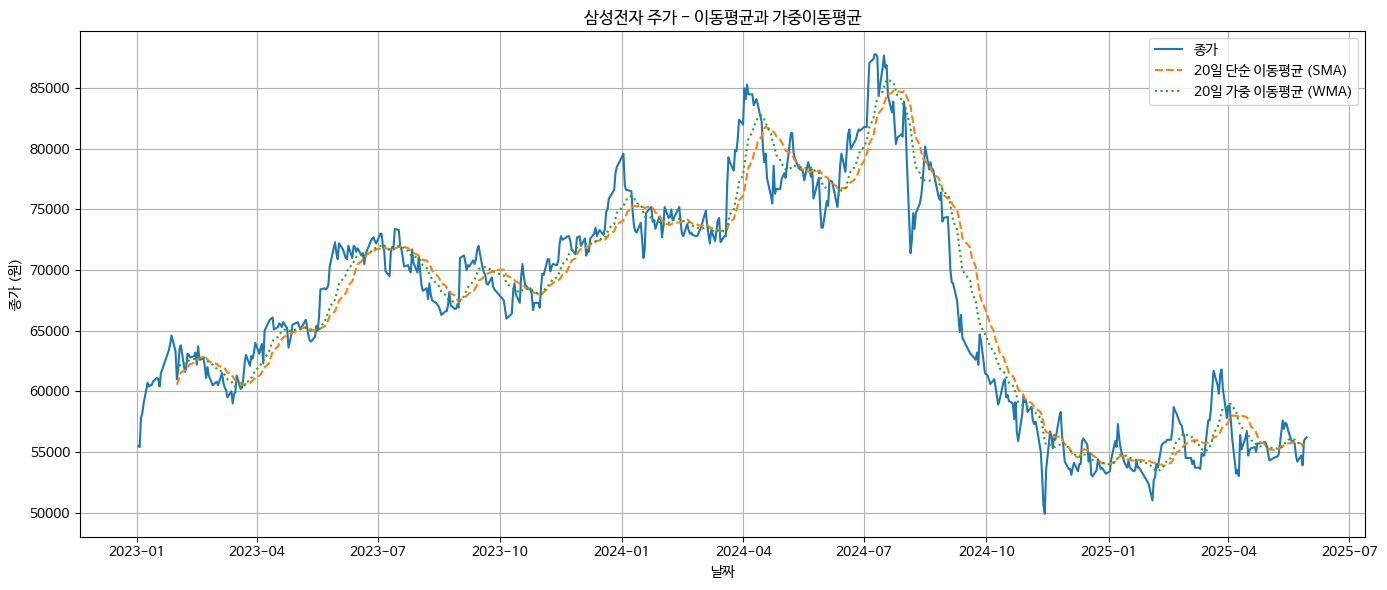

In [8]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 삼성전자 종가 데이터 불러오기
df = stock.get_market_ohlcv_by_date("2023-01-01", "2025-05-31", "005930")
close_prices = df['종가']

# 단순 이동평균 (20일)
sma = close_prices.rolling(window=20).mean()

# 가중 이동평균 (20일)
weights = [i / sum(range(1, 21)) for i in range(1, 21)]
wma = close_prices.rolling(window=20).apply(lambda x: sum(weights * x), raw=True)

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(close_prices, label='종가', linewidth=1.5)
plt.plot(sma, label='20일 단순 이동평균 (SMA)', linestyle='--')
plt.plot(wma, label='20일 가중 이동평균 (WMA)', linestyle=':')
plt.title("삼성전자 주가 - 이동평균과 가중이동평균")
plt.xlabel("날짜")
plt.ylabel("종가 (원)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 삼성전자 향후 12개월 주가 예측 : 2025.5.31 기준

C:\Users\JYB\AppData\Local\Temp\ipykernel_20140\639047112.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['종가'].resample('M').mean().interpolate()


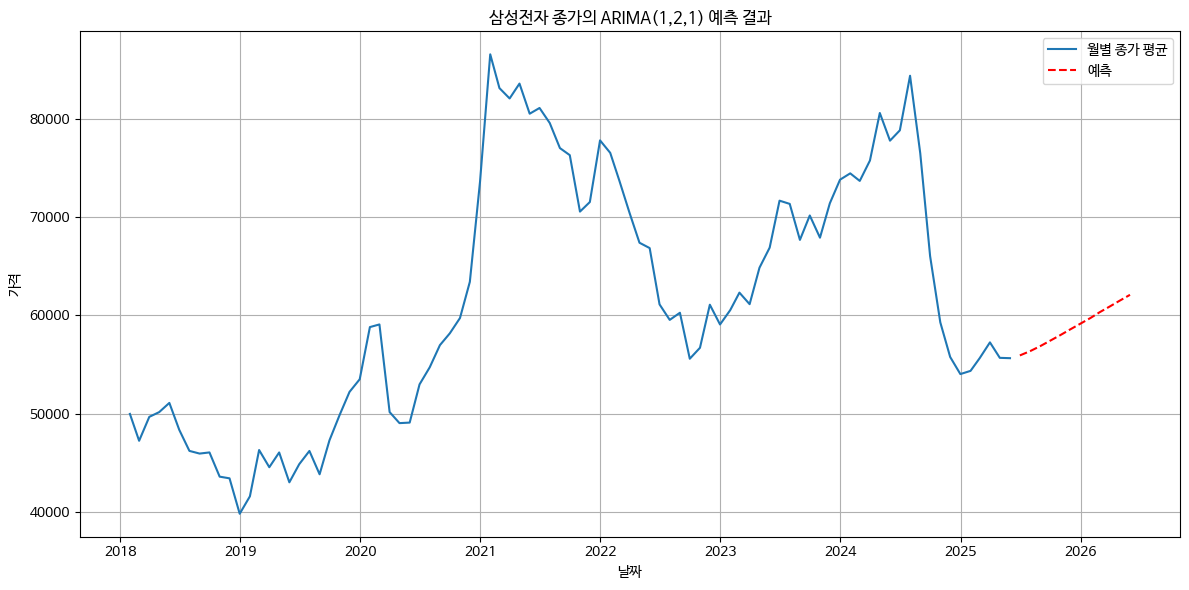

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from statsmodels.tsa.arima.model import ARIMA

# 1. 삼성전자 월간 종가 평균 데이터 가져오기
df = stock.get_market_ohlcv_by_date("2018-01-01", "2025-05-31", "005930")
df_monthly = df['종가'].resample('M').mean().interpolate()

# 2. ARIMA 모델 학습 (2차 차분 포함)
model = ARIMA(df_monthly, order=(1, 2, 1))
model_fit = model.fit()

# 3. 향후 12개월 예측
forecast = model_fit.forecast(steps=12)

# 4. 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_monthly, label='월별 종가 평균')
plt.plot(forecast.index, forecast, label='예측', color='red', linestyle='--')
plt.title("삼성전자 종가의 ARIMA(1,2,1) 예측 결과")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
